# Project X -- [Prisha] [Joshi]

**TA Help:** John Smith, Alice Jones

- Help with figuring out how to write a function.
    
**Collaboration:** Friend1, Friend2
    
- Helped figuring out how to load the dataset.
- Helped debug error with my plot.

## Question 1

In [ ]:


monthlydepdelays <- function(year) {
 
  data <- read.csv(paste0("/anvil/projects/tdm/data/flights/subset/", year, ".csv"))
  
 
  ind_flights <- subset(data, Origin == "IND")
  
  
  avg_monthly_delays <- tapply(ind_flights$DepDelay, ind_flights$Month, mean, na.rm = TRUE)
  
  return(avg_monthly_delays)
}


print(monthlydepdelays(1990))
print(monthlydepdelays(1998))
print(monthlydepdelays(2005))



Markdown notes and sentences and analysis written here.

## Question 2

In [ ]:

# Function to calculate average monthly departure delays for a given year at IND airport
monthlydepdelays <- function(year) {
  # Load flight data for the specified year
  data <- read.csv(paste0("/anvil/projects/tdm/data/flights/subset/", year, ".csv"))
  
  # Filter for flights with origin at Indianapolis (IND)
  ind_flights <- subset(data, Origin == "IND")
  
  # Calculate average departure delay by month
  avg_monthly_delays <- tapply(ind_flights$DepDelay, ind_flights$Month, mean, na.rm = TRUE)
  
  return(avg_monthly_delays)
}

# Test the function on the specified years
print(monthlydepdelays(1990))
print(monthlydepdelays(1998))
print(monthlydepdelays(2005))


par(mfrow = c(3, 2))


sapply(1988:1993, function(x) {
  plot(monthlydepdelays(x), type = "b", main = paste("Year:", x),
       xlab = "Month", ylab = "Average DepDelay", pch = 19, col = "blue")
})


Markdown notes and sentences and analysis written here.

## Question 3

In [2]:
library(data.table)

myindycities <- function(myyear) {
   
    file_path <- paste0("/anvil/projects/tdm/data/election/itcont", myyear, ".txt")
    
    
    DF <- fread(file_path, sep = "|", header = FALSE, quote = "", integer64 = "character")
    
  
    
  
    myvalue <- DF[, .(City = V9, State = V10, Donations = suppressWarnings(as.numeric(V14)))]
    
    myvalue <- na.omit(myvalue)

 
    indiana_donations <- myvalue[State == "IN"]

   
    donation_total <- tapply(indiana_donations$Donations, indiana_donations$City, sum, na.rm = TRUE)

    top10 <- sort(donation_total, decreasing = TRUE)[1:10]
    
    return(top10)
}


print("1980")
myindycities(1980)
print("1986")
myindycities(1986)
print("1992")
myindycities(1992)

[1] "1980"


INDIANAPOLIS       MUNCIE   FORT WAYNE       CARMEL     FT WAYNE   EVANSVILLE 
  9830126488   1467869292   1234830786   1125950577   1064891297    961568924 
     ELKHART   SOUTH BEND       INDPLS    LAFAYETTE 
   936451305    850143504    800133533    515758276

[1] "1986"


INDIANAPOLIS   FORT WAYNE      ELKHART       MUNCIE   EVANSVILLE       CARMEL 
  6040335199   1109813717    866382378    788650403    749212465    531270849 
  SOUTH BEND  TERRE HAUTE       KOKOMO   ZIONSVILLE 
   456978995    378637224    342991340    297087301

[1] "1992"


INDIANAPOLIS   FORT WAYNE   EVANSVILLE       CARMEL   SOUTH BEND       MUNCIE 
 24426233129   5526229726   4060525349   3719563018   3134514533   2717176839 
    COLUMBUS      ELKHART  BLOOMINGTON      MUNSTER 
  2241863606   2001277307   1554040130   1192680562

Markdown notes and sentences and analysis written here.

## Question 4

$`1984`
INDIANAPOLIS       INDPLS       MUNCIE      ELKHART   EVANSVILLE   SOUTH BEND 
  3226435470    827054351    746508034    722170343    719030362    534620525 
    FT WAYNE   FORT WAYNE       CARMEL  TERRE HAUTE 
   453003064    418471000    340705058    306119188 

$`1986`
INDIANAPOLIS   FORT WAYNE      ELKHART       MUNCIE   EVANSVILLE       CARMEL 
  6040335199   1109813717    866382378    788650403    749212465    531270849 
  SOUTH BEND  TERRE HAUTE       KOKOMO   ZIONSVILLE 
   456978995    378637224    342991340    297087301 

$`1988`
INDIANAPOLIS   FORT WAYNE      ELKHART       CARMEL   SOUTH BEND       MUNCIE 
  9101258051   1511923486   1395457579   1275707866   1111640026   1082165980 
    COLUMBUS   EVANSVILLE      MUNSTER       INDPLS 
   952312319    840368533    551535103    487735243 

$`1990`
INDIANAPOLIS   FORT WAYNE       CARMEL   SOUTH BEND   EVANSVILLE       MUNCIE 
 16951751021   7976913868   2295391989   2262452678   2077174569   2038088357 
    COLUMBUS   

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

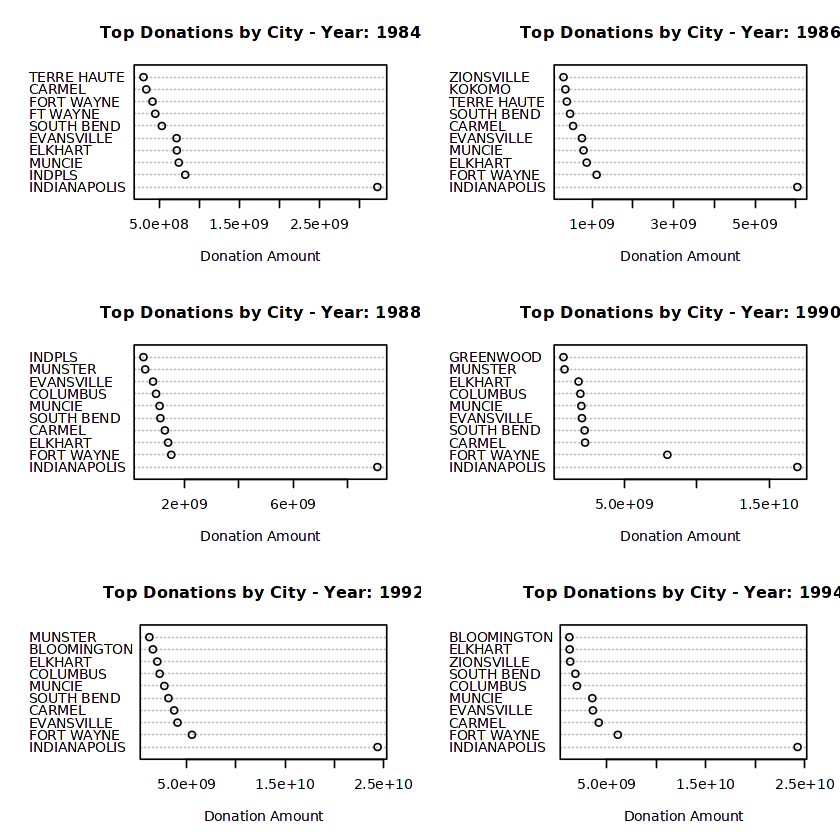

In [3]:

years <- seq(1984, 1994, by = 2)


myresults <- lapply(years, myindycities)
names(myresults) <- years


print(myresults)


par(mfrow = c(3, 2))


sapply(years, function(x) {
  top_cities <- myresults[[as.character(x)]]
  if (!is.null(top_cities)) {
    dotchart(as.numeric(top_cities), labels = names(top_cities),
             main = paste("Top Donations by City - Year:", x),
             xlab = "Donation Amount")
  }
})

Markdown notes and sentences and analysis written here.

## Question 5

In [4]:

myavgstars <- function(company) {
  
  file_path <- paste0("/anvil/projects/tdm/data/icecream/", company, "/reviews.csv")
  
 
  if (!file.exists(file_path)) {
    warning(paste("File not found for company:", company))
    return(NA) 
  }
  
  
  data <- read.csv(file_path)
  
  
  avg_stars <- mean(data$stars, na.rm = TRUE)
  return(avg_stars)
}


companies <- c("bj", "breyers", "hd", "talenti")


average_stars <- sapply(companies, myavgstars)
print(average_stars)

      bj  breyers       hd  talenti 
4.305804 4.027961 4.218475 4.311624 


Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.